In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
user_df = pd.read_pickle("/content/drive/MyDrive/Companies Interview Projects/InShorts/cleaned_data/user_embed_df.pkl")          # columns: deviceId, final_user_embed
news_df = pd.read_pickle("/content/drive/MyDrive/Companies Interview Projects/InShorts/cleaned_data/news_embed_df.pkl")               # columns: hashId, title, categories, hashtags, news_embedding
interaction_df = pd.read_csv("/content/drive/MyDrive/Companies Interview Projects/InShorts/cleaned_data/interaction_cleaned_data.csv")    # columns: deviceId, hashId, overallTimeSpent, event_type, etc.


/tmp/ipython-input-2494019739.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interaction_df = pd.read_csv("/content/drive/MyDrive/Companies Interview Projects/InShorts/cleaned_data/interaction_cleaned_data.csv")    # columns: deviceId, hashId, overallTimeSpent, event_type, etc.


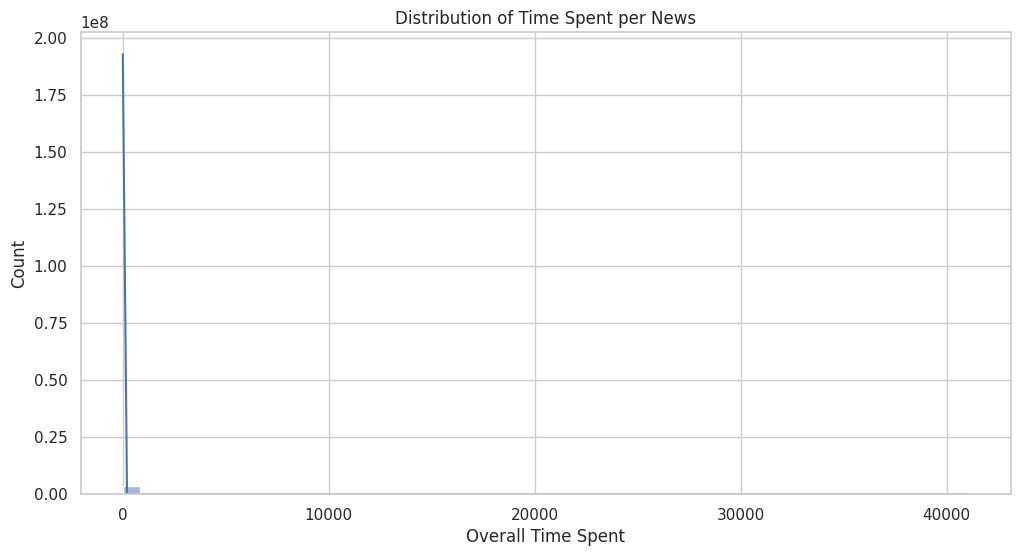

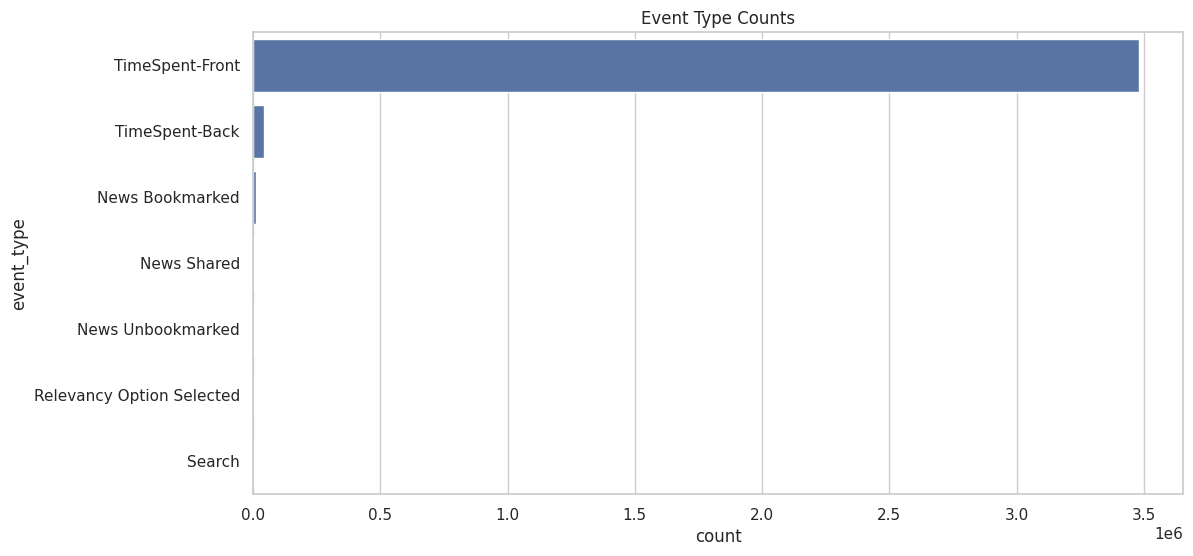

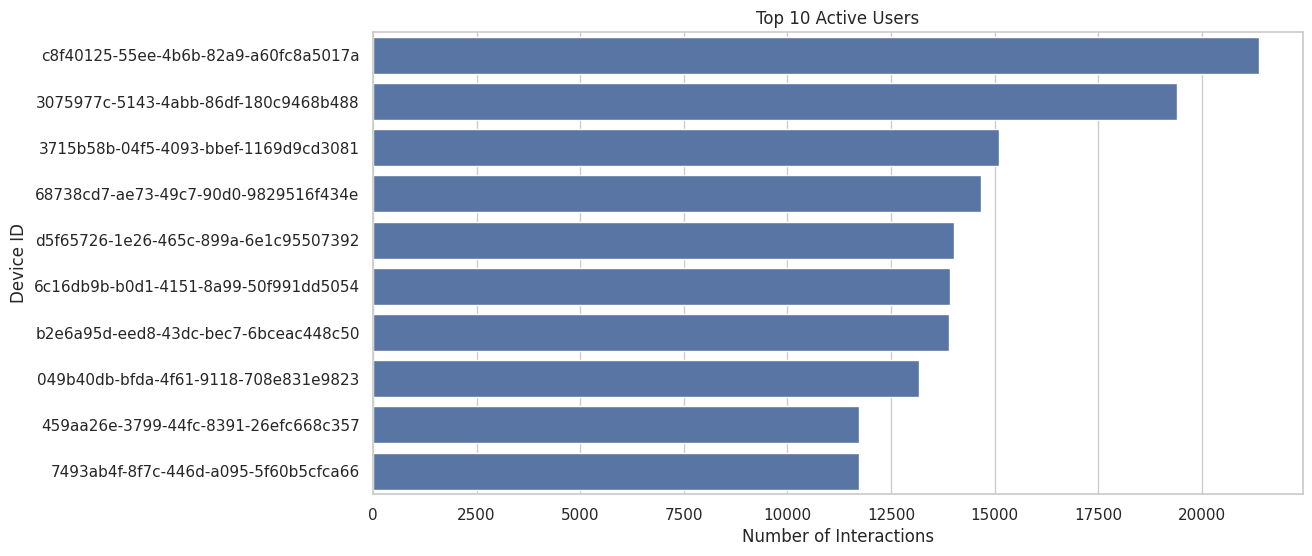

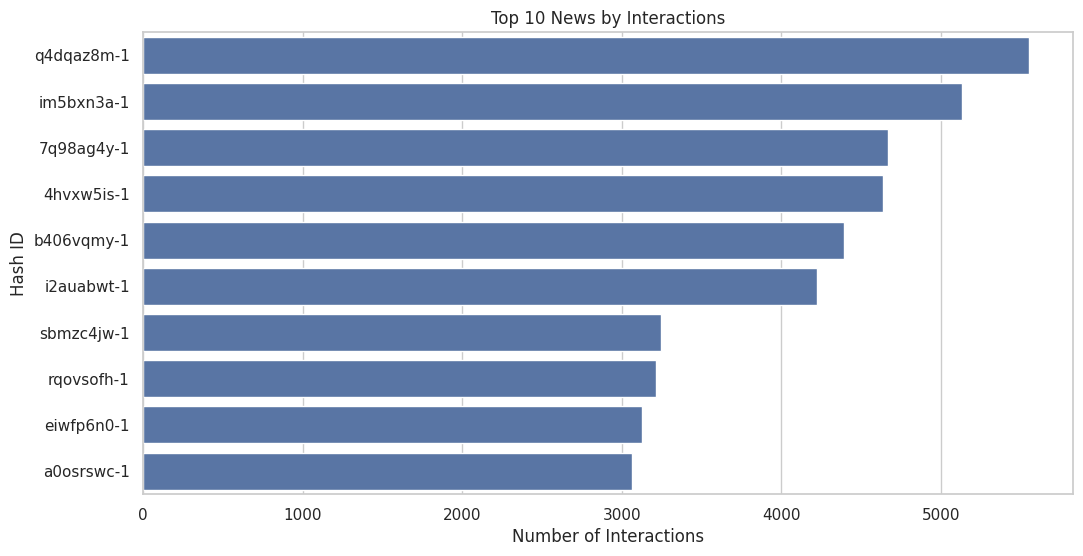

In [4]:
# Interaction Analysis

def interaction_analysis(interaction_df):
    # Distribution of overallTimeSpent
    sns.histplot(interaction_df['overallTimeSpent'], bins=50, kde=True)
    plt.title("Distribution of Time Spent per News")
    plt.xlabel("Overall Time Spent")
    plt.ylabel("Count")
    plt.show()

    # Event type distribution
    sns.countplot(y='event_type', data=interaction_df, order=interaction_df['event_type'].value_counts().index)
    plt.title("Event Type Counts")
    plt.show()

    # Top active users
    top_users = interaction_df['deviceId'].value_counts().head(10)
    sns.barplot(x=top_users.values, y=top_users.index)
    plt.title("Top 10 Active Users")
    plt.xlabel("Number of Interactions")
    plt.ylabel("Device ID")
    plt.show()

    # Top news articles by interactions
    top_news = interaction_df['hashId'].value_counts().head(10)
    sns.barplot(x=top_news.values, y=top_news.index)
    plt.title("Top 10 News by Interactions")
    plt.xlabel("Number of Interactions")
    plt.ylabel("Hash ID")
    plt.show()


interaction_analysis(interaction_df)

                               deviceId       mean        sum  count
0  0002d448-f398-44d8-8806-df93d1dc770b   6.462496   2384.661    369
1  000d4df6-dbdd-4438-8456-e23a6f52e1c5  11.041919  23894.712   2164
2  00198103-e45e-4b33-804b-84ff19562d62  11.512078  21090.126   1832
3  002a4793-c451-4916-b6c4-6a31c98cbd7c   7.118000      7.118      1
4  002da5aa-573b-441c-941b-df5597f1637e   6.680213   1917.221    287


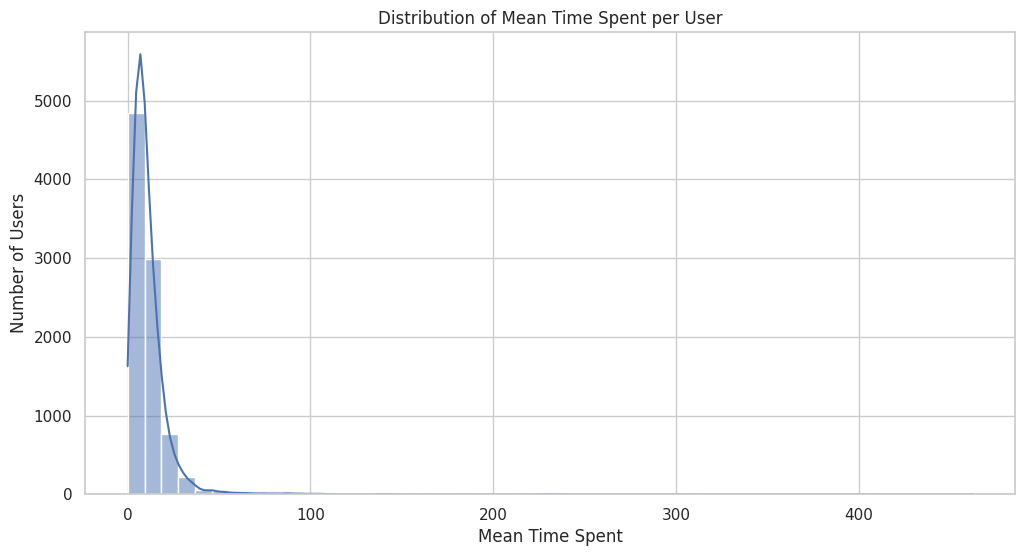

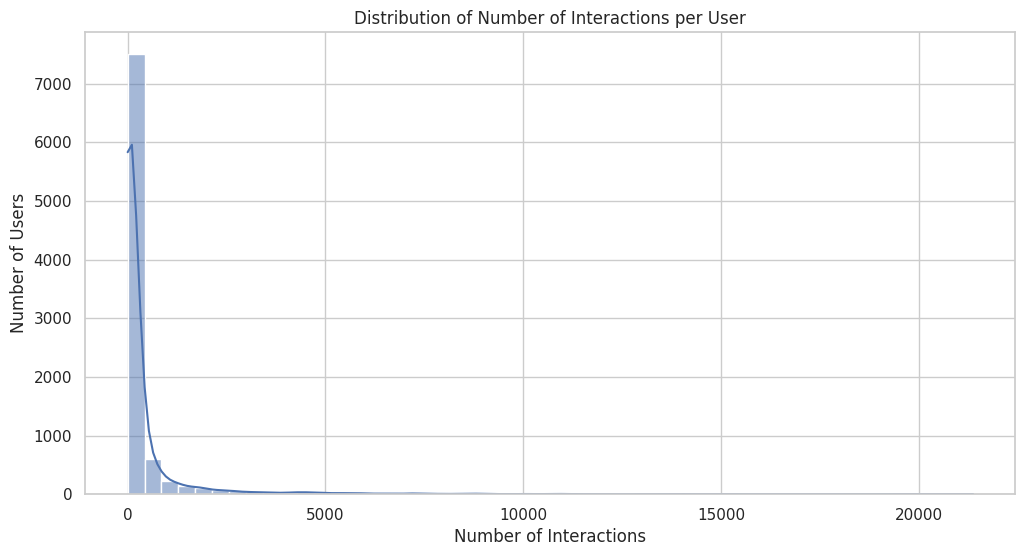

In [5]:
# User Engagement Insights

def user_engagement(interaction_df):
    user_time = interaction_df.groupby('deviceId')['overallTimeSpent'].agg(['mean','sum','count']).reset_index()
    print(user_time.head())

    # Histogram of mean time spent per user
    sns.histplot(user_time['mean'], bins=50, kde=True)
    plt.title("Distribution of Mean Time Spent per User")
    plt.xlabel("Mean Time Spent")
    plt.ylabel("Number of Users")
    plt.show()

    # Histogram of number of interactions per user
    sns.histplot(user_time['count'], bins=50, kde=True)
    plt.title("Distribution of Number of Interactions per User")
    plt.xlabel("Number of Interactions")
    plt.ylabel("Number of Users")
    plt.show()

user_engagement(interaction_df)

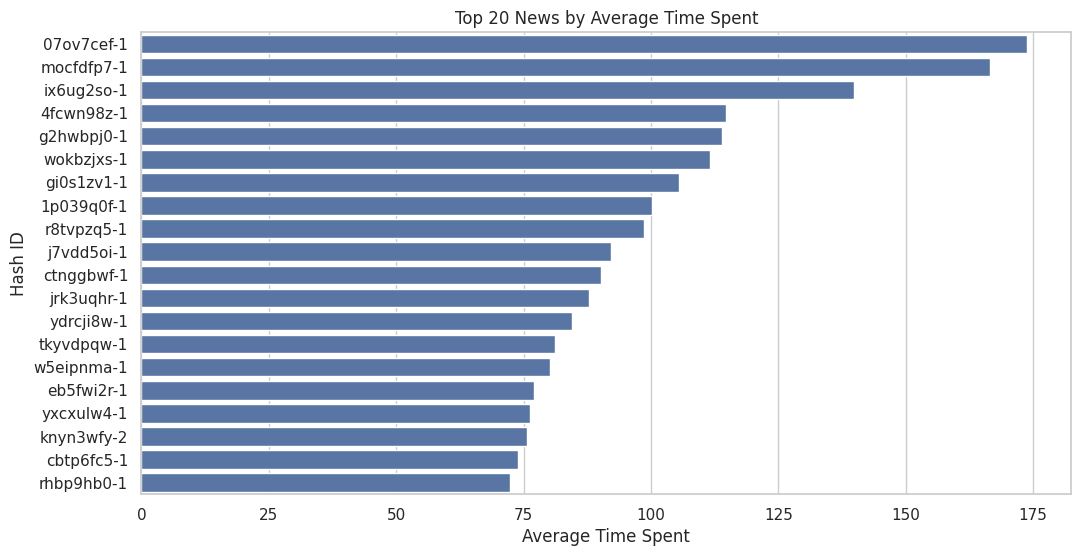

In [6]:
#  News Insights
def news_analysis(news_df, interaction_df):
    # News categories distribution
    if 'categories' in news_df.columns:
        cat_counts = news_df['categories'].value_counts().head(20)
        sns.barplot(x=cat_counts.values, y=cat_counts.index)
        plt.title("Top News Categories")
        plt.xlabel("Count")
        plt.ylabel("Category")
        plt.show()

    # News language distribution
    if 'newsLanguage' in news_df.columns:
        lang_counts = news_df['newsLanguage'].value_counts()
        sns.barplot(x=lang_counts.values, y=lang_counts.index)
        plt.title("News Language Distribution")
        plt.xlabel("Count")
        plt.ylabel("Language")
        plt.show()

    # Average time spent per news
    news_time = interaction_df.groupby('hashId')['overallTimeSpent'].mean().sort_values(ascending=False).head(20)
    sns.barplot(x=news_time.values, y=news_time.index)
    plt.title("Top 20 News by Average Time Spent")
    plt.xlabel("Average Time Spent")
    plt.ylabel("Hash ID")
    plt.show()

news_analysis(news_df, interaction_df)

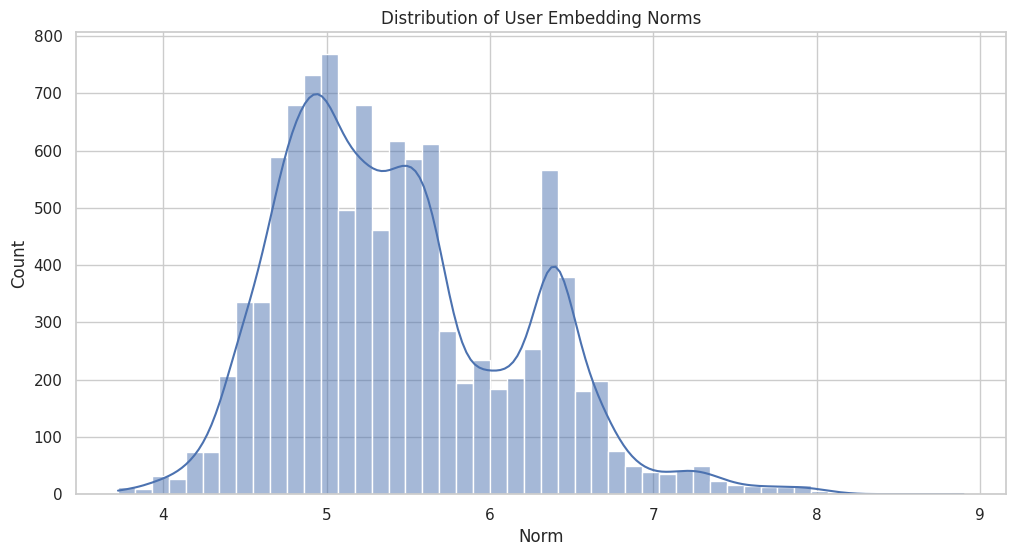

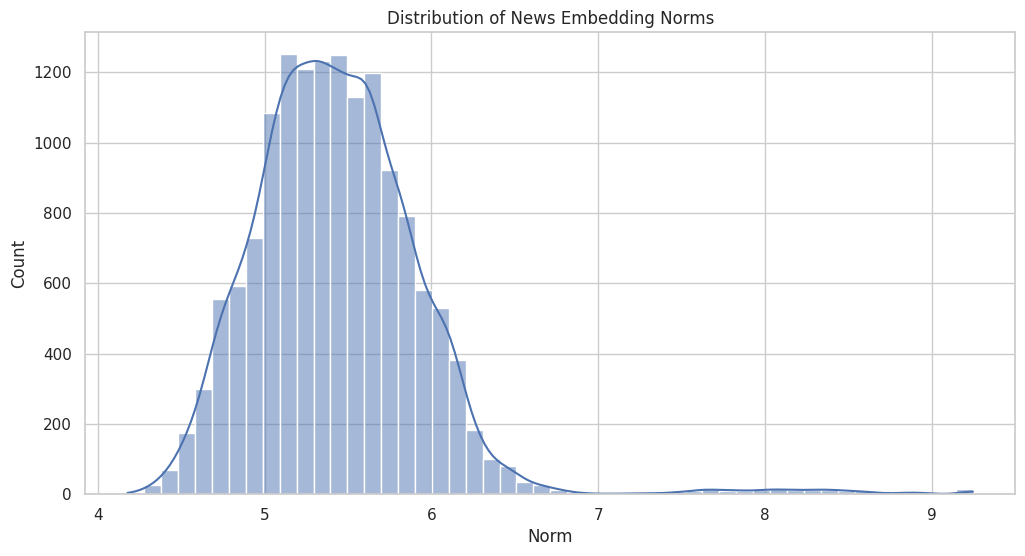

In [8]:
#  Embedding Space Analysis

def embedding_analysis(user_df, news_df):
    # User embedding norms
    user_norms = np.linalg.norm(np.vstack(user_df['user_embed'].values), axis=1)
    sns.histplot(user_norms, bins=50, kde=True)
    plt.title("Distribution of User Embedding Norms")
    plt.xlabel("Norm")
    plt.ylabel("Count")
    plt.show()

    # News embedding norms
    news_norms = np.linalg.norm(np.vstack(news_df['news_embed'].values), axis=1)
    sns.histplot(news_norms, bins=50, kde=True)
    plt.title("Distribution of News Embedding Norms")
    plt.xlabel("Norm")
    plt.ylabel("Count")
    plt.show()

embedding_analysis(user_df, news_df)

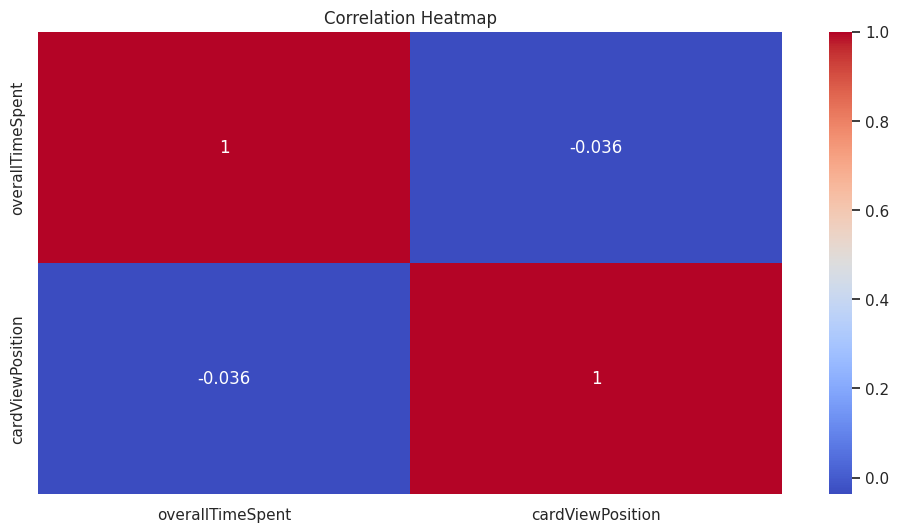

In [9]:
#  Correlations & Heatmaps

def correlation_heatmap(interaction_df):
    if 'overallTimeSpent' in interaction_df.columns:
        corr = interaction_df[['overallTimeSpent', 'cardViewPosition']].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()

correlation_heatmap(interaction_df)

In [10]:
# Summary Statistics
def summary_statistics(interaction_df, news_df, user_df):
    print(f"Total Users: {user_df['deviceId'].nunique()}")
    print(f"Total News: {news_df['hashId'].nunique()}")
    print(f"Total Interactions: {len(interaction_df)}")
    print(f"Average Interactions per User: {len(interaction_df)/user_df['deviceId'].nunique():.2f}")
    print(f"Average Interactions per News: {len(interaction_df)/news_df['hashId'].nunique():.2f}")

summary_statistics(interaction_df, news_df, user_df)

Total Users: 10400
Total News: 14621
Total Interactions: 3544154
Average Interactions per User: 340.78
Average Interactions per News: 242.40
